In [3]:
import pandas as pd
from DAFD.rv_study.rv_utils import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("data/20220519_boundary_points.csv")
# d1 = pd.read_csv("data/20220429/20220512_data_2000000.csv")
# d2 = pd.read_csv("data/20220429/20220512_data_2500000.csv")
# d3 = pd.read_csv("data/20220429/20220512_data_3500000.csv")
#dists = pd.read_csv("20220517_boundary_points.csv")
# old_data = pd.read_csv("data/20210419_all_data_working.csv")

In [16]:
data.loc[data.flow_stability==-1,:].chip_number.unique()

array([ 4520, 10145, 10270], dtype=int64)

In [2]:
old_data = pd.read_csv("data/20220429/20220517_data_500000.csv")


In [79]:
cols_to_use = ['index', 'aspect_ratio', 'capillary_number', 'chip_number',
       'droplet_size', 'expansion_ratio', 'flow_rate_ratio', 'generation_rate',
       'inferred_size', 'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size', 'regime']

In [80]:
vers_data = dists_different_units.loc[:,cols_to_use]

In [82]:
vers_data.to_csv("20220520_allData.csv")

In [10]:
to_analyze = 28100
# chip1 = dists.loc[dists.chip_number == to_analyze,:]
# chip2 = dists_different_units.loc[dists_different_units.chip_number == to_analyze,:]
chip3 = dists_different_units.loc[dists_different_units.chip_number == to_analyze,:]


Text(0, 0.5, 'Flow Rate Ratio')

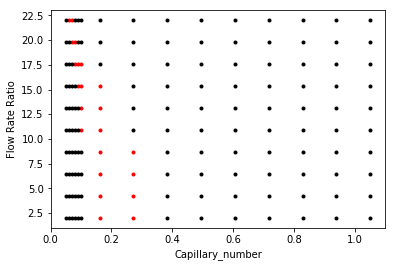

In [11]:
# b2 = chip2.loc[chip2.regime==1, :]
# nb2 = chip2.loc[chip2.regime==2, :]

b1 = chip3.loc[chip3.boundary==1, :]
nb1 = chip3.loc[chip3.boundary==0, :]


# plt.plot(b2.capillary_number, b2.flow_rate_ratio, "ro")
# plt.plot(nb2.capillary_number, nb2.flow_rate_ratio, "ko")

plt.plot(b1.capillary_number, b1.flow_rate_ratio, "r.")
plt.plot(nb1.capillary_number, nb1.flow_rate_ratio, "k.")
#plt.xlim([0, .3])
plt.xlabel("Capillary_number")
plt.ylabel("Flow Rate Ratio")

Text(0, 0.5, 'Flow Rate Ratio')

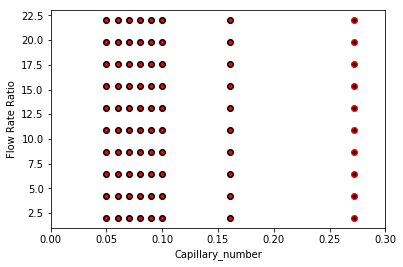

In [99]:
b2 = chip2.loc[chip2.boundary==1, :]
nb2 = chip2.loc[chip2.boundary==0, :]

b1 = chip1.loc[chip1.boundary==1, :]
nb1 = chip1.loc[chip1.boundary==0, :]


plt.plot(b2.capillary_number, b2.flow_rate_ratio, "ro")
plt.plot(nb2.capillary_number, nb2.flow_rate_ratio, "ko")

plt.plot(b1.capillary_number, b1.flow_rate_ratio, "r.")
plt.plot(nb1.capillary_number, nb1.flow_rate_ratio, "k.")
plt.xlim([0, .3])
plt.xlabel("Capillary_number")
plt.ylabel("Flow Rate Ratio")

In [3]:
data = dists_different_units
# data = data.loc[data.loc[:,"generation_rate"] > 5, :]
# data = data.loc[data.loc[:,"generation_rate"] < 500, :]
# data = data.loc[data.loc[:,"droplet_size"] > 25, :]
# data = data.loc[data.loc[:,"droplet_size"] < 250, :]
#data.loc[data.boundary==1,"flow_stability"] = 0
#data = data.loc[data.loc[:,"regime"] == 1, :]


In [110]:
#data_w_distance = old_data#.loc[old_data.regime == 1, :]#data.loc[data.flow_stability > 0,:]
data_w_distance = data#.loc[data.loc[:,"boundary"] == 0, :]

In [112]:
# Perform Main Effect analysis on all results
meff_cols = ['aspect_ratio', 'expansion_ratio',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size', "capillary_number", "flow_rate_ratio"]

meff_vals = {}
for col in meff_cols:
    
    sweep_range = np.sort(data_w_distance[col].unique())
    size_score_avgs = []
    rate_score_avgs = []
    score_avgs = []
    size_score_std = []
    rate_score_std = []
    score_std = []
    
    
    for val in sweep_range:
        #size_avgs.append(size_normalized[data[col] == val].mean())
        score_avgs.append(data_w_distance.loc[data_w_distance[col] == val, "flow_stability"].mean())
        score_std.append(data_w_distance.loc[data_w_distance[col] == val, "flow_stability"].std())

        
        #meff_vals[col] = {"range": sweep_range, "size_averages": size_avgs, "rate_averages": rate_avgs}
    meff_vals[col] = {"range": sweep_range, "score_avgs": score_avgs, "score_std":score_std}
    

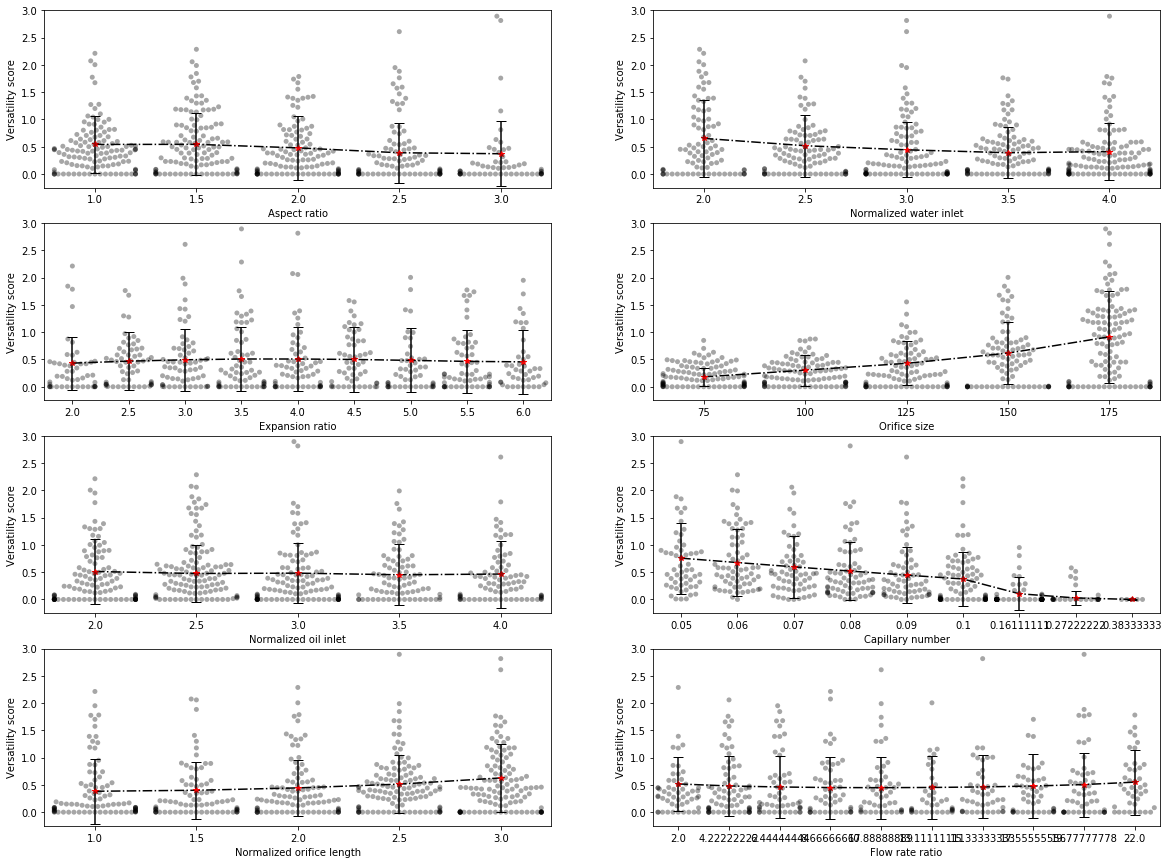

In [119]:
import matplotlib
meff_cols = ['aspect_ratio', 'expansion_ratio',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size', "capillary_number", "flow_rate_ratio"]
nice_columns = ["Aspect ratio", "Expansion ratio","Normalized oil inlet", "Normalized orifice length",
               "Normalized water inlet", "Orifice size", "Capillary number", "Flow rate ratio"]
fig, axs = plt.subplots(4,2, figsize=[20,15])


data_to_use = data_w_distance.sample(500)
for i, col in enumerate(meff_cols):
    param_range = meff_vals[col]["range"]
    score = meff_vals[col]["score_avgs"]
    err = meff_vals[col]["score_std"]
#     print(i)
#     print(i%4)
#     print(int(i>4))#+ np.floor(i/4))
#     print()
    sns.swarmplot(ax=axs[i%4][int(i>=4)], x=col, y="flow_stability", data=data_to_use, color="0", alpha=.35, size=5)
    axs[i%4][int(i>=4)].errorbar(range(len(score)), score, yerr=err, fmt="r*", ecolor="k", capsize=5)
    axs[i%4][int(i>=4)].set(ylim=(-.25, 3), ylabel="Versatility score", xlabel=nice_columns[i])
    if col == "capillary_number":
        axs[i%4][int(i>=4)].plot(range(len(score[:9])), score[:9], "k-.")
    else:
        axs[i%4][int(i>=4)].plot(range(len(score)), score, "k-.")
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    plt.savefig("20220520_flow_stability_same_units_dripping.pdf")

In [3]:
most = {"aspect_ratio": 1.5,
        "expansion_ratio": 3.5,
       "normalized_oil_inlet": 2.0,
       "normalized_orifice_length": 3.0,
       "normalized_water_inlet": 2.0,
       "orifice_size": 175} 
#         "capillary_number": .05, #might chage this 
#         "flow_rate_ratio": 22.0}
least = {"aspect_ratio": 3.0,
        "expansion_ratio": 2.0,
       "normalized_oil_inlet": 3.5,
       "normalized_orifice_length": 1.0,
       "normalized_water_inlet": 3.5,
       "orifice_size": 75}#,
#         "capillary_number": 0.161111, #might change this 
#         "flow_rate_ratio": 10.888889}

In [5]:
data = dists_different_units

In [6]:
most_data = data
least_data = data
for col in most.keys():
    most_data = most_data.loc[most_data[col]==most[col],:]
    least_data = least_data.loc[least_data[col]==least[col],:]
    

In [7]:
col_to_use = ["capillary_number", "flow_rate_ratio","water_flow","oil_flow","droplet_size", "generation_rate", "flow_stability", "regime","boundary"]

In [8]:
most_chip = most_data.loc[:,col_to_use]

In [9]:
least_chip = least_data.loc[:,col_to_use]

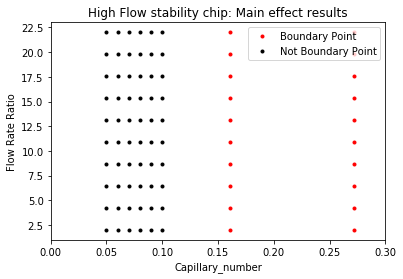

In [10]:
b1 = most_chip.loc[most_chip.boundary==1, :]
nb1 = most_chip.loc[most_chip.boundary==0, :]


# plt.plot(b2.capillary_number, b2.flow_rate_ratio, "ro")
# plt.plot(nb2.capillary_number, nb2.flow_rate_ratio, "ko")

plt.plot(b1.capillary_number, b1.flow_rate_ratio, "r.")
plt.plot(nb1.capillary_number, nb1.flow_rate_ratio, "k.")
plt.xlim([0, .3])
plt.xlabel("Capillary_number")
plt.ylabel("Flow Rate Ratio")
plt.title("High Flow stability chip: Main effect results")
plt.legend(["Boundary Point", "Not Boundary Point"])

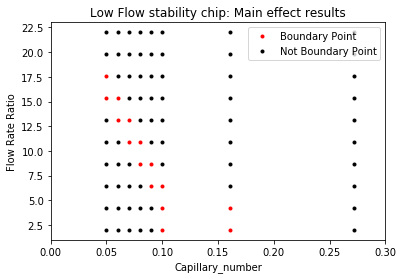

In [11]:
b2 = least_chip.loc[least_chip.boundary==1, :]
nb2 = least_chip.loc[least_chip.boundary==0, :]


# plt.plot(b2.capillary_number, b2.flow_rate_ratio, "ro")
# plt.plot(nb2.capillary_number, nb2.flow_rate_ratio, "ko")

plt.plot(b2.capillary_number, b2.flow_rate_ratio, "r.")
plt.plot(nb2.capillary_number, nb2.flow_rate_ratio, "k.")
plt.xlim([0, .3])
plt.xlabel("Capillary_number")
plt.ylabel("Flow Rate Ratio")
plt.title("Low Flow stability chip: Main effect results")
plt.legend(["Boundary Point", "Not Boundary Point"])

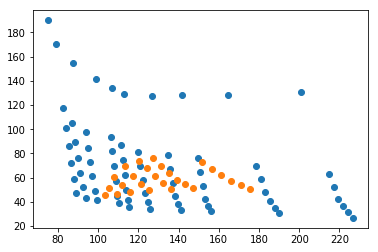

In [14]:
mdrip = most_chip.loc[most_chip.regime==1,:]
ldrip = least_chip.loc[least_chip.regime==1,:]
plt.scatter(mdrip.droplet_size, mdrip.generation_rate)
plt.scatter(ldrip.droplet_size, ldrip.generation_rate)


In [174]:
pd.concat([data.loc[3600606,:], data.loc[688506,:]], axis=1)

,3600606,688506
Unnamed: 0,3600606,688506
Unnamed: 0.1,3600606,688506
Unnamed: 0.1.1,3600606,688506
index,1920368,367248
Unnamed: 0.1.1.1,1920368,367248
aspect_ratio,1.5,3
capillary_number,0.05,0.05
chip_number,24004,4590
droplet_size,110.3,103.312
expansion_ratio,3.5,2


In [25]:
0.0202*1000/60

0.33666666666666667

In [ ]:
data.iloc[3600606,:]

In [16]:
least_chip.loc[least_chip.capillary_number < 0.2].to_csv("20220530_least_FS.csv")

In [11]:
most_chip.loc[most_chip.capillary_number > 0.3].to_csv("20220602_moreleftovers.csv")#.loc[most_chip.capillary_number < 0.4].to_csv("2022_letover,csv")

In [125]:
for col in meff_vals.keys():
    print(col)
    print(pd.DataFrame(meff_vals[col]))
    print("\n")

aspect_ratio
   range  score_avgs  score_std
0    1.0    0.542984   0.524445
1    1.5    0.544103   0.566255
2    2.0    0.479527   0.587227
3    2.5    0.389861   0.549323
4    3.0    0.372089   0.600405


expansion_ratio
   range  score_avgs  score_std
0    2.0    0.433057   0.485548
1    2.5    0.469096   0.528004
2    3.0    0.493980   0.566050
3    3.5    0.508622   0.587172
4    4.0    0.508458   0.594497
5    4.5    0.500163   0.598617
6    5.0    0.483286   0.587316
7    5.5    0.464987   0.575723
8    6.0    0.456210   0.580298


normalized_oil_inlet
   range  score_avgs  score_std
0    2.0    0.512365   0.591516
1    2.5    0.475897   0.525614
2    3.0    0.482343   0.548404
3    3.5    0.452280   0.556654
4    4.0    0.465683   0.615096


normalized_orifice_length
   range  score_avgs  score_std
0    1.0    0.383345   0.597523
1    1.5    0.401584   0.524937
2    2.0    0.444767   0.508717
3    2.5    0.513957   0.526739
4    3.0    0.627896   0.626185


normalized_water_inl